In [1]:
from fastai2.vision.all import *
from fastai2_audio.all import *
from siren import siren_model

In [2]:
audio = AudioTensor.create("Samples/LapsBM-F006-LapsBM_0101.wav")

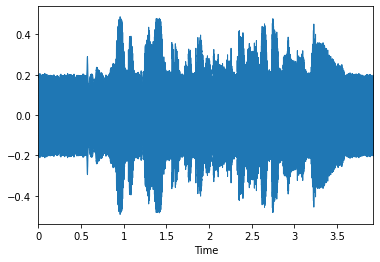

In [3]:
audio.show(hear=True)

In [4]:
audio.shape

torch.Size([1, 62787])

In [5]:
y = audio.transpose(0, 1)
y.shape

torch.Size([62787, 1])

In [6]:
x = torch.arange(-100, 100, step=200/62787).unsqueeze(1)
x.shape

torch.Size([62787, 1])

In [7]:
from torch.utils.data import TensorDataset
dset = TensorDataset(x.cuda(), y.cuda())

In [8]:
dls = DataLoaders(DataLoader(dset, bs=8 * 2048), DataLoader(dset, bs=8 * 2048))

In [9]:
learn = Learner(dls, 
    siren_model([1, 256, 256, 256, 256, 1]).cuda(), 
    loss_func=MSELossFlat(),
    opt_func=ranger           
    )

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.0020892962347716093)

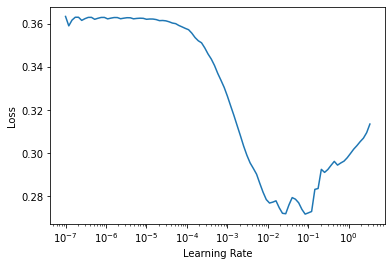

In [80]:
learn.lr_find()

In [81]:
learn.fit_flat_cos(150, lr=1e-3)

epoch,train_loss,valid_loss,time
0,0.368377,0.358784,00:05
1,0.360493,0.310954,00:05
2,0.331884,0.274179,00:05
3,0.305779,0.192324,00:05
4,0.278004,0.161838,00:05
5,0.251637,0.143416,00:05
6,0.229124,0.109975,00:05
7,0.209265,0.096473,00:05
8,0.192020,0.089411,00:05
9,0.176914,0.076428,00:05


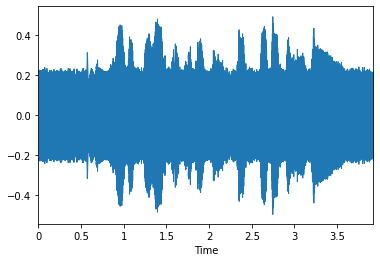

In [82]:
out = learn.model(x.cuda())
out = AudioTensor(out.transpose(0, 1).cpu(), sr=audio.sr)
out.show()

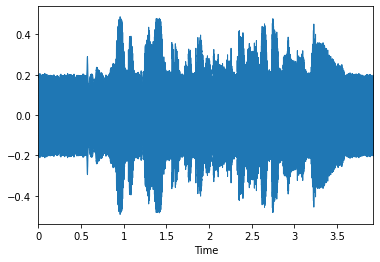

In [85]:
# Original audio
audio.show()